# Import necessary libraries

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from collections import Counter
import warnings as war

war.filterwarnings('ignore')

# Load the dataset

In [17]:
file_path = 'AllProductReviews.csv'  
df = pd.read_csv(file_path)

# Display basic information about the dataset

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14337 entries, 0 to 14336
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ReviewTitle  14337 non-null  object
 1   ReviewBody   14337 non-null  object
 2   ReviewStar   14337 non-null  int64 
 3   Product      14337 non-null  object
dtypes: int64(1), object(3)
memory usage: 448.2+ KB


# Display the first few rows of the datase

In [19]:
df.head()

,ReviewTitle,ReviewBody,ReviewStar,Product
0,Honest review of an edm music lover\n,No doubt it has a great bass and to a great ex...,3,boAt Rockerz 255
1,Unreliable earphones with high cost\n,"This earphones are unreliable, i bought it be...",1,boAt Rockerz 255
2,Really good and durable.\n,"i bought itfor 999,I purchased it second time,...",4,boAt Rockerz 255
3,stopped working in just 14 days\n,Its sound quality is adorable. overall it was ...,1,boAt Rockerz 255
4,Just Awesome Wireless Headphone under 1000...😉\n,Its Awesome... Good sound quality & 8-9 hrs ba...,5,boAt Rockerz 255


# Data Cleaning
# Check for missing values

In [20]:
df.isnull().sum()

ReviewTitle    0
ReviewBody     0
ReviewStar     0
Product        0
dtype: int64

# Remove duplicates

In [21]:
df = df.drop_duplicates()

# Downloading the required files

In [22]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kanis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kanis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Text Preprocessing

In [23]:
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

In [24]:
def preprocess_text(text):
    # Tokenize
    words = word_tokenize(text)
    # Remove stopwords and apply stemming
    words = [ps.stem(word) for word in words if word.lower() not in stop_words and word.isalpha()]
    return ' '.join(words)

In [26]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [27]:
df['CleanedReviewBody'] = df['ReviewBody'].apply(preprocess_text)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13938 entries, 0 to 14336
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ReviewTitle        13938 non-null  object
 1   ReviewBody         13938 non-null  object
 2   ReviewStar         13938 non-null  int64 
 3   Product            13938 non-null  object
 4   CleanedReviewBody  13938 non-null  object
dtypes: int64(1), object(4)
memory usage: 653.3+ KB


# Basic Exploratory Data Analysis (EDA)
# Distribution of ReviewStar ratings

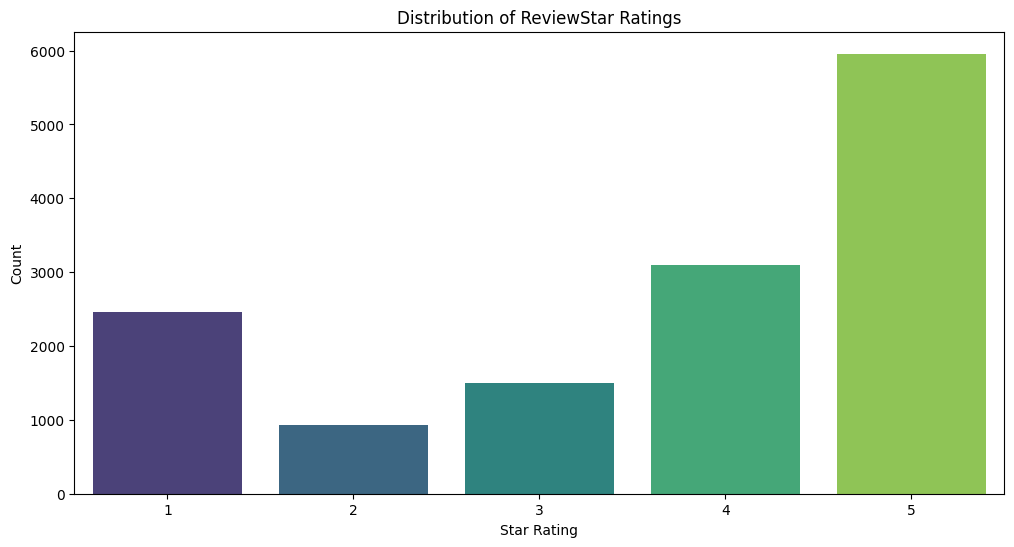

In [41]:
plt.figure(figsize=(12, 6))
sns.countplot(x='ReviewStar', data=df, palette='viridis')
plt.title("Distribution of ReviewStar Ratings")
plt.xlabel("Star Rating")
plt.ylabel("Count")
plt.show()

# Length of Review Titles and Bodies

In [39]:
df['ReviewTitleLength'] = df['ReviewTitle'].apply(len)
df['ReviewBodyLength'] = df['ReviewBody'].apply(len)

# Plot the distribution of review lengths

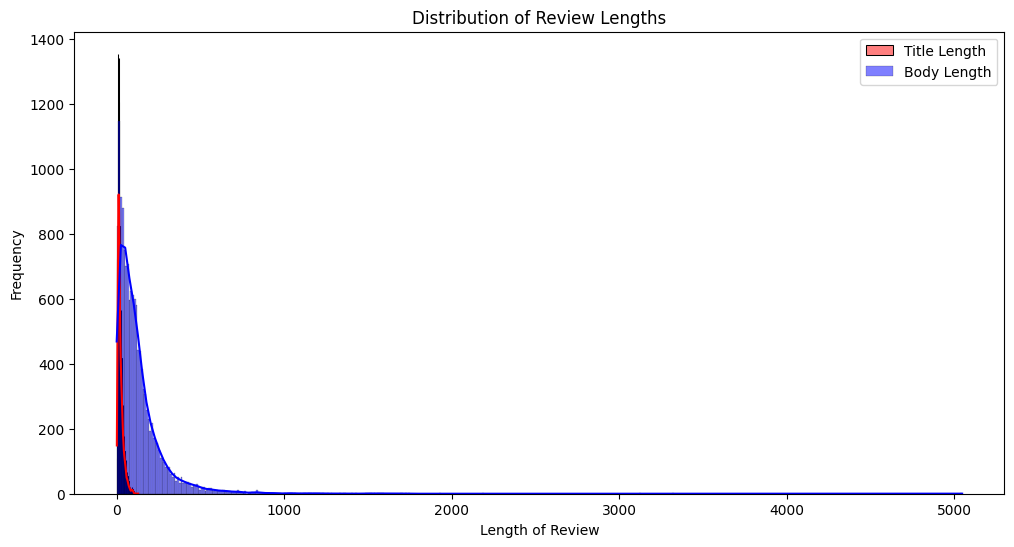

In [42]:
plt.figure(figsize=(12, 6))
sns.histplot(df['ReviewTitleLength'], kde=True, color='red', label='Title Length')
sns.histplot(df['ReviewBodyLength'], kde=True, color='blue', label='Body Length')
plt.title("Distribution of Review Lengths")
plt.xlabel("Length of Review")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Frequency of reviews per product

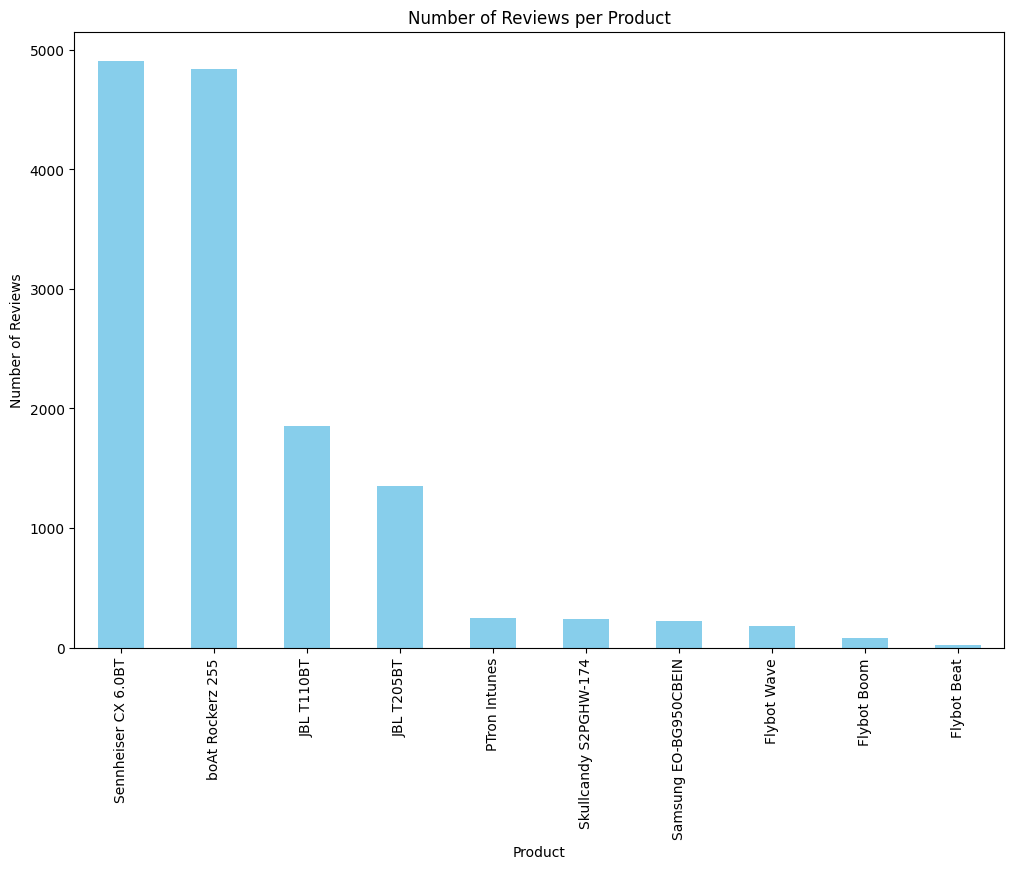

In [43]:
plt.figure(figsize=(12, 8))
df['Product'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Number of Reviews per Product")
plt.xlabel("Product")
plt.ylabel("Number of Reviews")
plt.show()

# Advanced Sentiment Analysis
# Function to calculate sentiment polarity and subjectivity

In [44]:
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity, analysis.sentiment.subjectivity

df['SentimentPolarity'], df['SentimentSubjectivity'] = zip(*df['CleanedReviewBody'].apply(get_sentiment))

# Distribution of Sentiment Polarity and Subjectivity

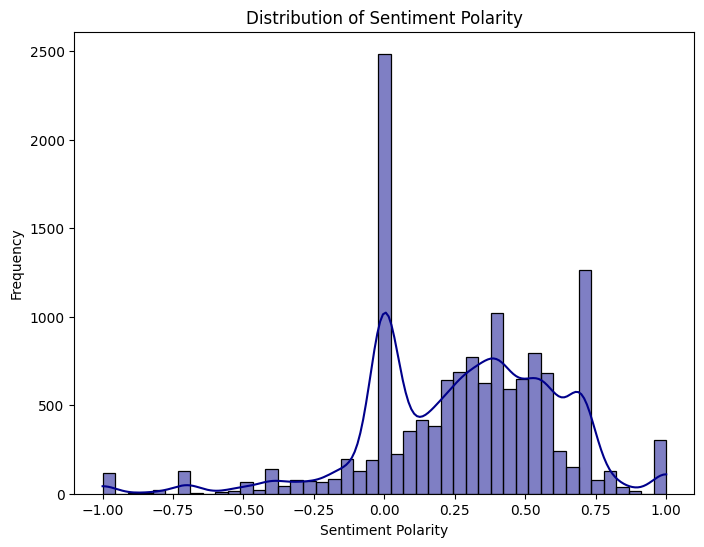

In [53]:
plt.figure(figsize=(8, 6))
sns.histplot(df['SentimentPolarity'], kde=True, color='darkblue')
plt.title("Distribution of Sentiment Polarity")
plt.xlabel("Sentiment Polarity")
plt.ylabel("Frequency")
plt.show()

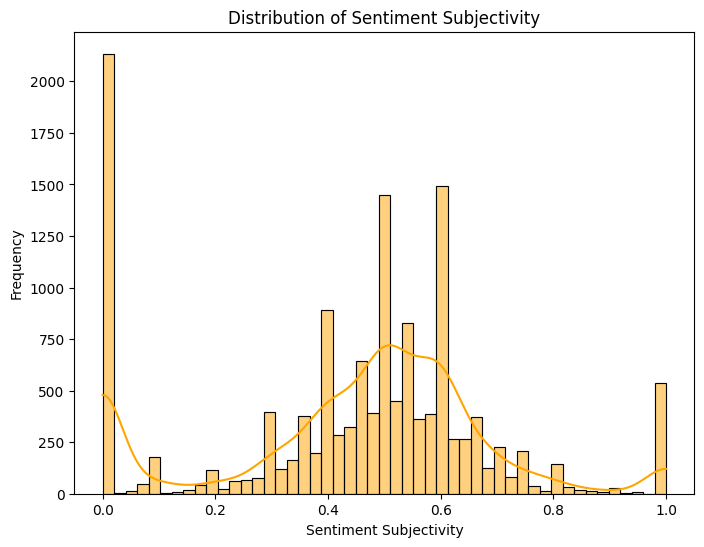

In [54]:
plt.figure(figsize=(8, 6))
sns.histplot(df['SentimentSubjectivity'], kde=True, color='orange')
plt.title("Distribution of Sentiment Subjectivity")
plt.xlabel("Sentiment Subjectivity")
plt.ylabel("Frequency")
plt.show()

# Correlation between sentiment and star rating

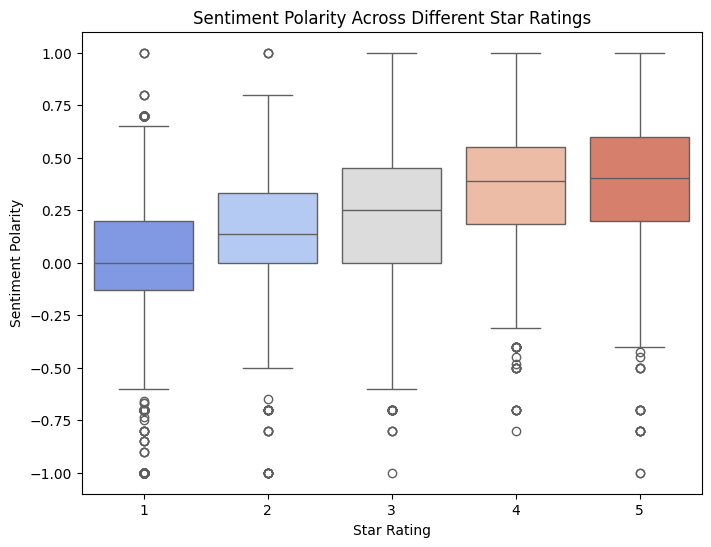

In [55]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='ReviewStar', y='SentimentPolarity', data=df, palette='coolwarm')
plt.title("Sentiment Polarity Across Different Star Ratings")
plt.xlabel("Star Rating")
plt.ylabel("Sentiment Polarity")
plt.show()

# Word Frequency Analysis
# Create a word cloud for positive, neutral, and negative reviews

In [56]:
positive_text = ' '.join(df[df['SentimentPolarity'] > 0]['CleanedReviewBody'])
negative_text = ' '.join(df[df['SentimentPolarity'] < 0]['CleanedReviewBody'])
neutral_text = ' '.join(df[df['SentimentPolarity'] == 0]['CleanedReviewBody'])

# Word cloud for positive reviews

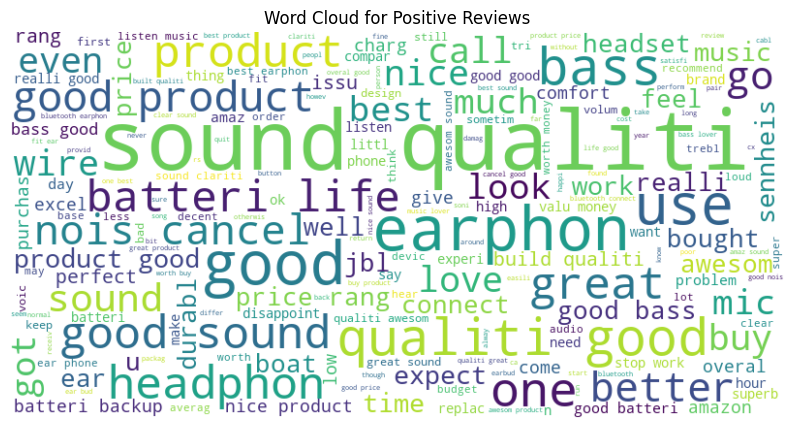

In [59]:
plt.figure(figsize=(10, 6))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Positive Reviews")
plt.show()

# Word cloud for negative reviews

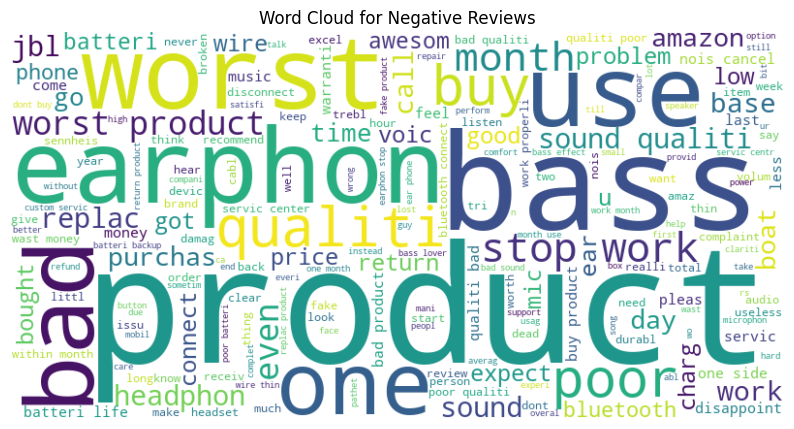

In [62]:
plt.figure(figsize=(10, 6))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Negative Reviews")
plt.show()

# N-gram Analysis
# Generate bigrams and trigrams

In [63]:
def get_ngrams(text, n=2):
    vec = CountVectorizer(ngram_range=(n, n)).fit([text])
    bag_of_words = vec.transform([text])
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:10]

In [64]:
positive_bigrams = get_ngrams(positive_text, 2)
negative_bigrams = get_ngrams(negative_text, 2)

print("Top 10 Bigrams in Positive Reviews:")
print(positive_bigrams)

print("Top 10 Bigrams in Negative Reviews:")
print(negative_bigrams)

Top 10 Bigrams in Positive Reviews:
[('sound qualiti', np.int64(2992)), ('qualiti good', np.int64(980)), ('good sound', np.int64(717)), ('batteri life', np.int64(664)), ('good product', np.int64(635)), ('nois cancel', np.int64(618)), ('product good', np.int64(395)), ('price rang', np.int64(325)), ('good bass', np.int64(303)), ('qualiti sound', np.int64(302))]
Top 10 Bigrams in Negative Reviews:
[('stop work', np.int64(117)), ('worst product', np.int64(110)), ('sound qualiti', np.int64(109)), ('batteri life', np.int64(52)), ('one side', np.int64(50)), ('nois cancel', np.int64(47)), ('qualiti bad', np.int64(46)), ('buy product', np.int64(44)), ('bad product', np.int64(42)), ('poor qualiti', np.int64(39))]


# Correlation Heatmap

corr = df[['ReviewStar', 'ReviewTitleLength', 'ReviewBodyLength', 'SentimentPolarity', 'SentimentSubjectivity']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Map rating

In [67]:
def map_rating_to_sentiment(rating):
    if rating <= 2:
        return 'negative'
    elif rating == 3:
        return 'neutral'
    else:
        return 'positive'

# Adding a new field to the dataset

In [68]:
df['SentimentLabel'] = df['ReviewStar'].apply(map_rating_to_sentiment)

# Split data into training and testing sets

In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['CleanedReviewBody'], df['SentimentLabel'], test_size=0.2, random_state=42)

# Create a pipeline with TF-IDF vectorizer and Logistic Regression

In [75]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

model = make_pipeline(
    TfidfVectorizer(stop_words='english'),
    LogisticRegression(max_iter=1000)
)

# Train the model

In [76]:
model.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer(stop_words='english')),
                ('logisticregression', LogisticRegression(max_iter=1000))])

# Make predictions

In [77]:
df['PredictedSentiment'] = model.predict(df['CleanedReviewBody'])

# Display the model performance on test data

In [79]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")


Classification Report:
              precision    recall  f1-score   support

    negative       0.73      0.66      0.69       692
     neutral       0.42      0.08      0.13       286
    positive       0.81      0.94      0.87      1810

    accuracy                           0.78      2788
   macro avg       0.65      0.56      0.56      2788
weighted avg       0.75      0.78      0.75      2788

Accuracy Score: 0.7840746054519369


In [80]:
# Save the updated dataset with sentiment predictions
df.to_csv('Enhanced_Cleaned_Analyzed_Predicted_ProductReviews.csv', index=False)